## WHAT IS DIABETES ?
Diabetes mellitus, commonly known as diabetes, is a metabolic disease that causes high blood sugar. The hormone insulin moves sugar from the blood into your cells to be stored or used for energy. With diabetes, your body either doesn’t make enough insulin or can’t effectively use the insulin it does make. And also, untreated high blood sugar from diabetes can damage your nerves, eyes, kidneys, and other organs.

## CONTEXT
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

This dataset consists several variables : 
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

***In this dataset, "Outcome" variable is the target variable of the dataset. Our object here is to predict whether patients with certain values have diabetes by creating a machine learning model. Also, if the class value is 1, diabetes indicates that the test result is positive.***

## 1) EXPLORATORY DATA ANALYSIS

In [1]:
# Required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

RANDOM_STATE = 42


In [2]:
#Reading the dataset and displaying top 5 observation unit
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
# Replace zero values with NaN in medically invalid columns
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)

# Fill missing values with median
df.fillna(df.median(), inplace=True)

df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [6]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,86.700,99.75000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,58.000,64.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,18.000,25.00000,29.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,140.671875,86.383060,14.000,67.000,121.50000,125.0000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,32.455208,6.875177,18.200,24.000,27.50000,32.3000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [7]:
df.Outcome.unique()

array([1, 0])

In [8]:
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [9]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

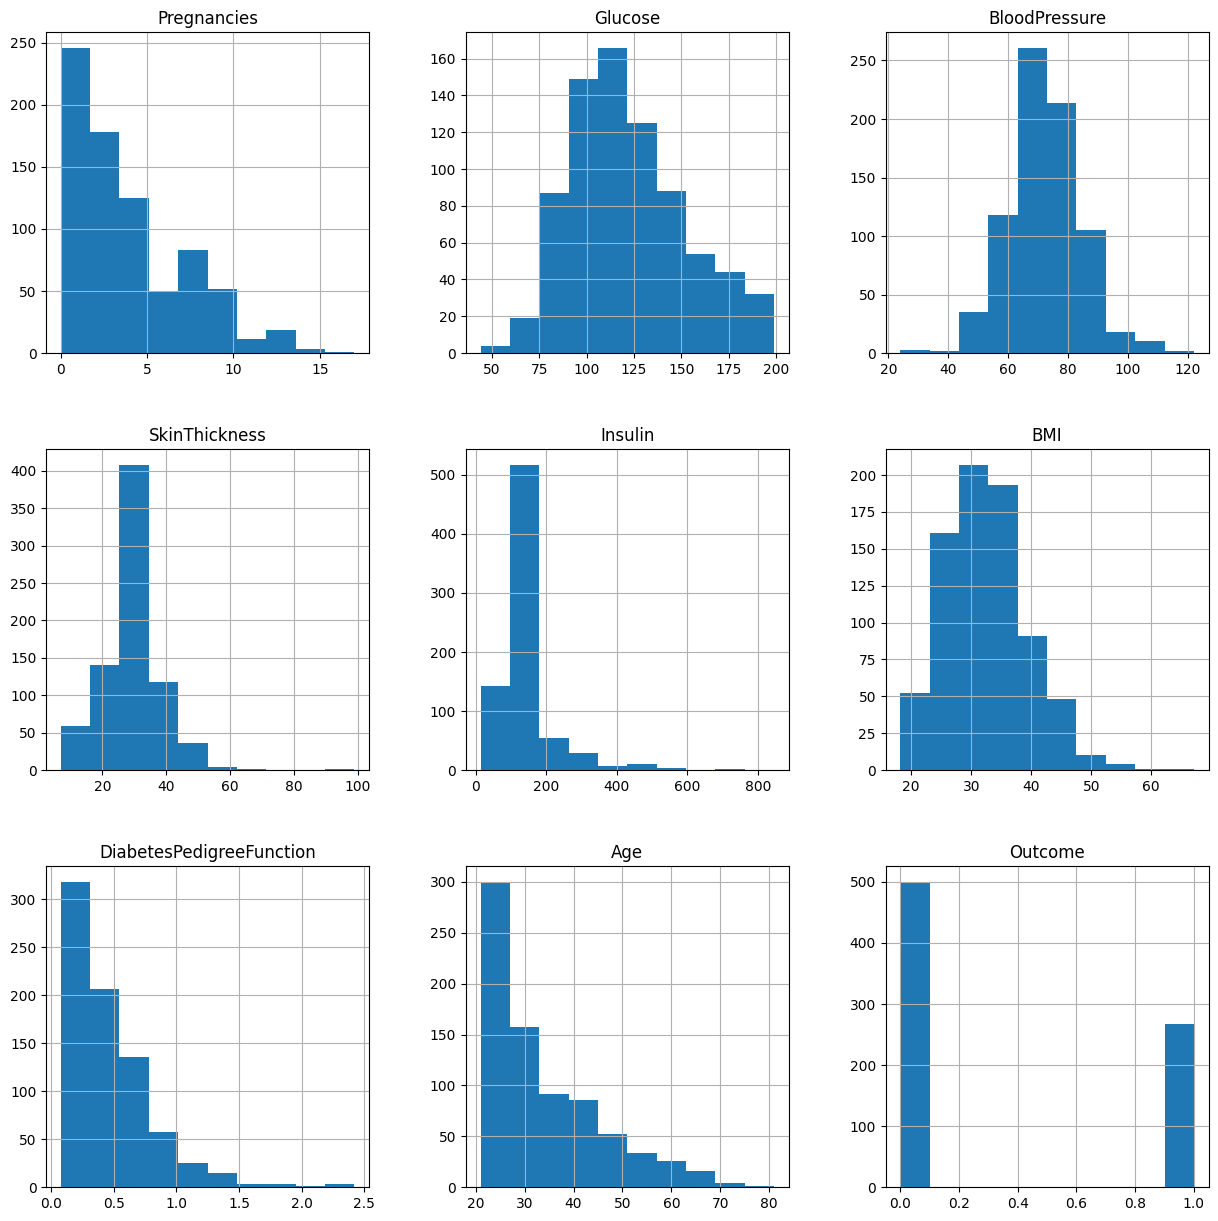

In [10]:
#The histograms of the all variables
df.hist(figsize = (15,15))

<Axes: >

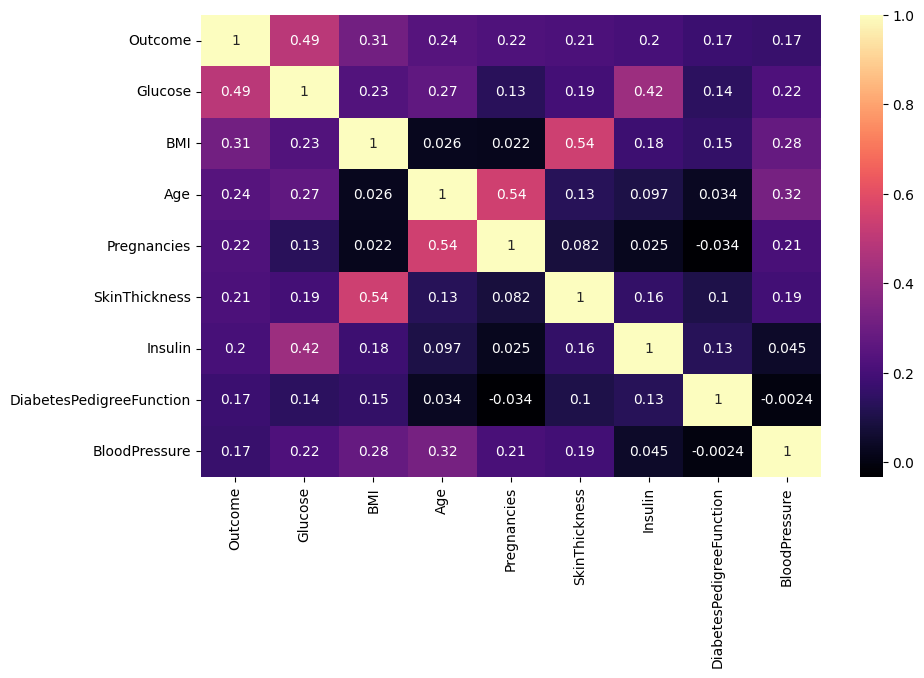

In [11]:
#Correlation Matrix
k = 9
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'magma')

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [13]:
df.groupby("Outcome").agg({"Pregnancies":"mean","Age":"mean","Insulin":"mean","Glucose":"mean"})

,Pregnancies,Age,Insulin,Glucose
Outcome,,,,
0,3.298000,31.190000,127.792000,110.682000
1,4.865672,37.067164,164.701493,142.130597


# 2) DATA PREPROCESSING

- MISSING VALUE ANALYSIS

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

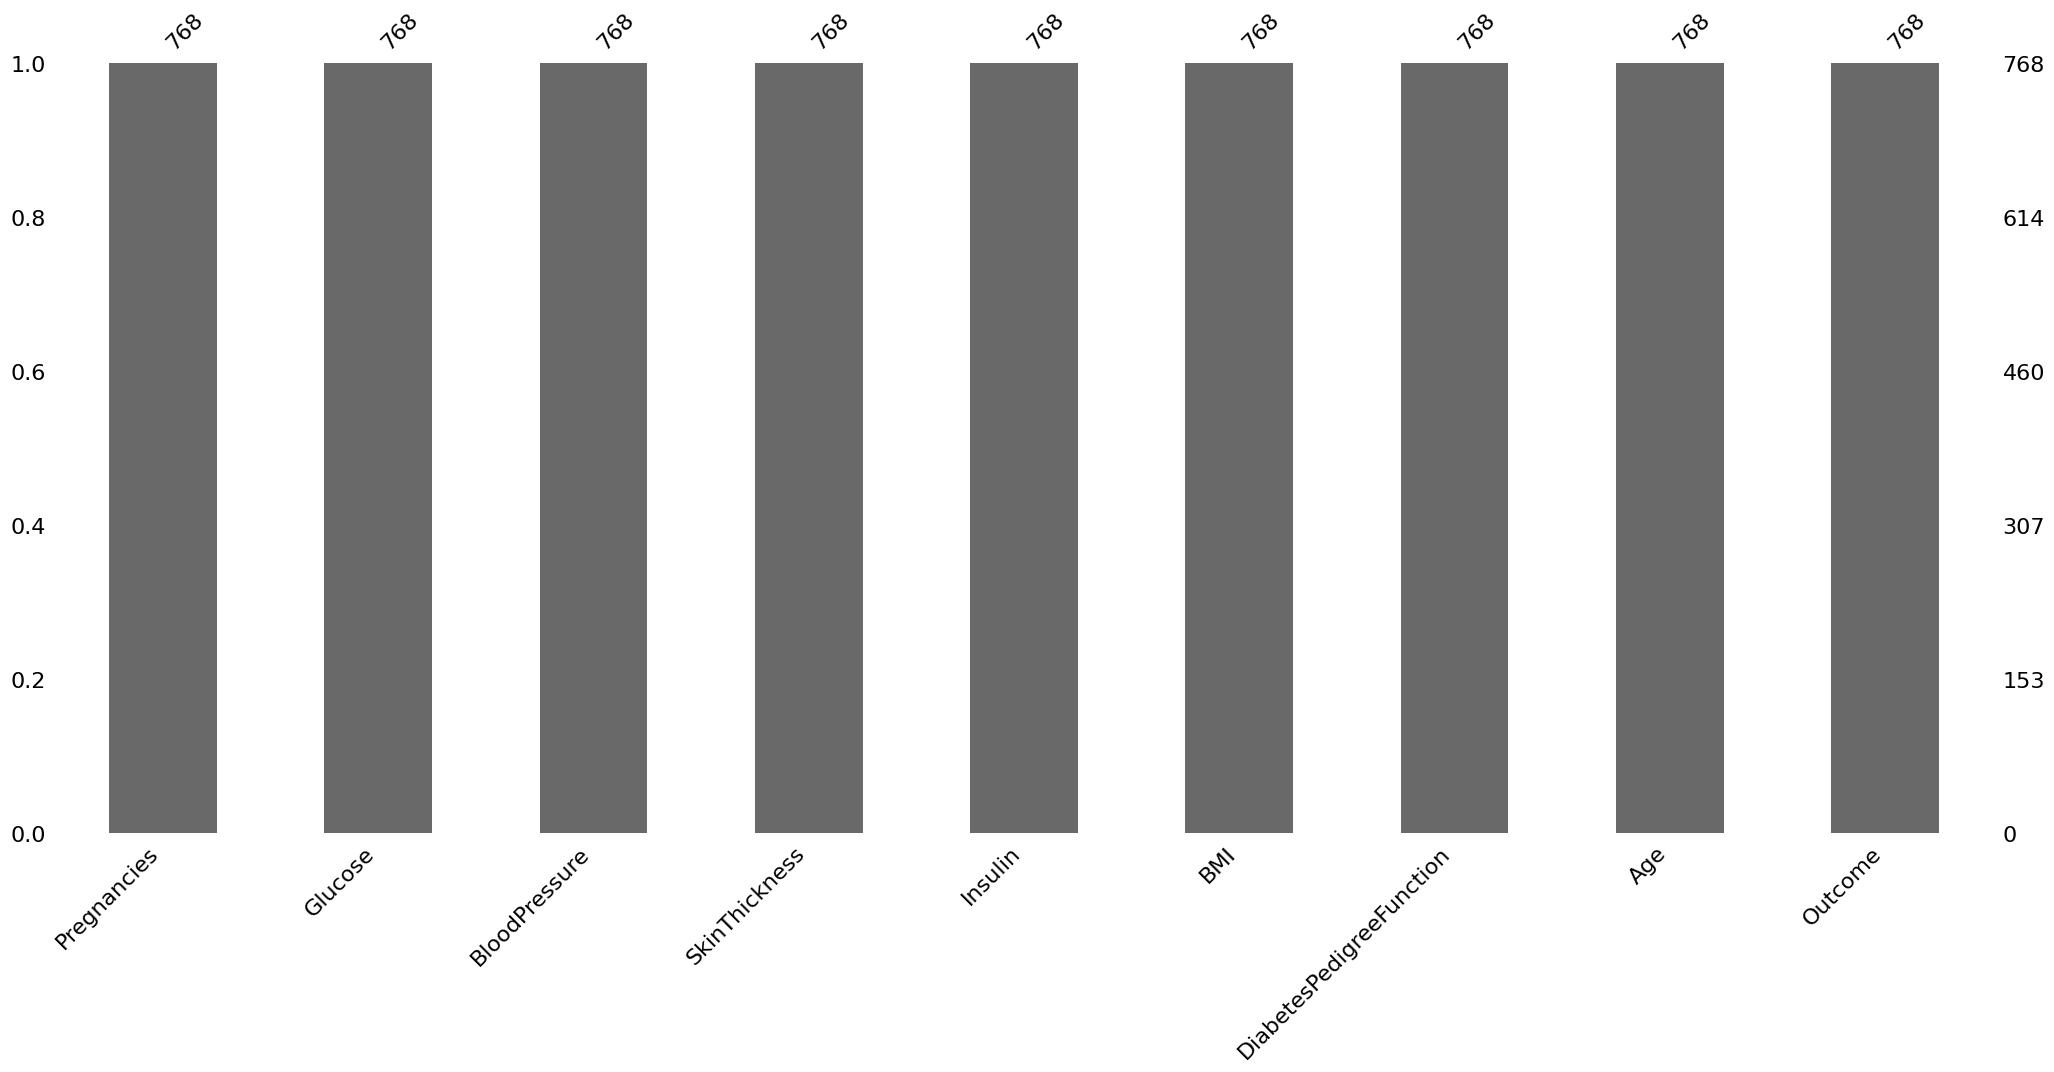

In [20]:
#NaN values according to target variable were filled with median values. And so, we got rid of missing values.
import missingno as msno
msno.bar(df);

- OUTLIER ANALYSIS

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [22]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1
767,1,93.0,70.0,31.0,125.0,30.4,0.315,23,0


In [23]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [24]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    else: 
        print(variable, "no")

In [25]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [26]:
for col in df.columns: 
    has_outliers(df,col)

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [27]:
df[df.columns] = df[df.columns].astype(float)
replace_with_thresholds(df, df.columns)


In [28]:
for col in df.columns:
    has_outliers(df, col)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1.0


In [30]:
df.shape

(768, 9)

# 3) FEATURE ENGINEERING

In this section, we aim to create new variables based on some independent variables in the data set. We aim to increase the prediction success of the model with the created variables.

In [31]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

df["NewBMI"] = NewBMI

df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [32]:
df.loc[(df.Outcome == 1) & (df.Insulin <= 100) , "Insulin"] = 70
df.loc[(df.Outcome == 0) & (df.Insulin >= 200 ) , "Insulin"] = 200
df.loc[(df.Outcome == 0) & (df.Glucose >= 175 ) , "Glucose"] = 175
df.loc[(df.Outcome == 1) & (df.Glucose <= 80 ) , "Glucose"] = 80
df.loc[(df.Outcome == 0) & (df.Pregnancies >= 13 ) , "Pregnancies"] = 13
df.loc[(df.Outcome == 0) & (df.DiabetesPedigreeFunction >= 1.3 ) , "DiabetesPedigreeFunction"] = 1.3
df.loc[(df.Outcome == 0) & (df.BMI >= 50 ) , "BMI"] = 50
df["NEW_g_p"] = (df.Glucose * df.Pregnancies) 
df["NEW_i_g"] = (df.Glucose * df.Insulin)

In [33]:
df['New_Glucose'] = pd.cut(x=df['Glucose'], bins=[0,74,99,139,200],labels = ["Low","Normal","Overweight","High"])

In [34]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [35]:
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

In [36]:
df.shape

(768, 14)

In [37]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NEW_g_p,NEW_i_g,New_Glucose,NewInsulinScore
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1.0,Obesity 1,888.0,18500.000,High,Normal
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0.0,Overweight,85.0,10625.000,Normal,Normal
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1.0,Normal,1464.0,22875.000,High,Normal
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0.0,Overweight,89.0,10045.875,Normal,Normal
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1.0,Obesity 3,0.0,18614.875,Overweight,Normal
5,5.0,116.0,74.0,29.0,125.000,25.6,0.201,30.0,0.0,Overweight,580.0,14500.000,Overweight,Normal
6,3.0,80.0,50.0,32.0,112.875,31.0,0.248,26.0,1.0,Obesity 1,240.0,9030.000,Normal,Normal
7,10.0,115.0,72.0,29.0,125.000,35.3,0.134,29.0,0.0,Obesity 2,1150.0,14375.000,Overweight,Normal
8,2.0,197.0,70.0,42.5,135.875,30.5,0.158,53.0,1.0,Obesity 1,394.0,26767.375,High,Normal
9,8.0,125.0,96.0,29.0,125.000,32.3,0.232,54.0,1.0,Obesity 1,1000.0,15625.000,Overweight,Normal


In [38]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    float64 
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    float64 
 8   Outcome                   768 non-null    float64 
 9   NewBMI                    768 non-null    category
 10  NEW_g_p                   768 non-null    float64 
 11  NEW_i_g                   768 non-null    float64 
 12  New_Glucose               768 non-null    category
 13  NewInsulinScore           768 non-null    str     
dtypes: ca

# 4) ONE-HOT ENCODING

Categorical variables in the data set should be converted into numerical values. 

In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NEW_g_p,NEW_i_g,New_Glucose,NewInsulinScore
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1.0,Obesity 1,888.0,18500.000,High,Normal
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0.0,Overweight,85.0,10625.000,Normal,Normal
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1.0,Normal,1464.0,22875.000,High,Normal
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0.0,Overweight,89.0,10045.875,Normal,Normal
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1.0,Obesity 3,0.0,18614.875,Overweight,Normal


In [40]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,
                               dummy_na=nan_as_category, drop_first=True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

In [41]:
categorical_columns = [col for col in df.columns
                           if len(df[col].unique()) <= 10
                      and col != "Outcome"]

In [42]:
df[categorical_columns].head()

,NewBMI,New_Glucose,NewInsulinScore
0,Obesity 1,High,Normal
1,Overweight,Normal,Normal
2,Normal,High,Normal
3,Overweight,Normal,Normal
4,Obesity 3,Overweight,Normal


In [43]:
df, new_cols_ohe = one_hot_encoder(df,categorical_columns)
new_cols_ohe

['NewBMI_Obesity 1',
 'NewBMI_Obesity 2',
 'NewBMI_Obesity 3',
 'NewBMI_Overweight',
 'NewBMI_Underweight',
 'New_Glucose_Normal',
 'New_Glucose_Overweight',
 'New_Glucose_High']

In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_g_p,NEW_i_g,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,New_Glucose_Normal,New_Glucose_Overweight,New_Glucose_High
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1.0,888.0,18500.000,True,False,False,False,False,False,False,True
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0.0,85.0,10625.000,False,False,False,True,False,True,False,False
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1.0,1464.0,22875.000,False,False,False,False,False,False,False,True
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0.0,89.0,10045.875,False,False,False,True,False,True,False,False
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1.0,0.0,18614.875,False,False,True,False,False,False,True,False


In [45]:
y = df["Outcome"]

columns_to_drop = [
    "Outcome",
    "NewBMI_Obesity 1",
    "NewBMI_Obesity 2",
    "NewBMI_Obesity 3",
    "NewBMI_Overweight",
    "NewBMI_Underweight",
    "NewInsulinScore_Normal",
    "New_Glucose_Normal",
    "New_Glucose_Overweight",
    "New_Glucose_High"
]

# Drop only columns that exist
X = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

cols = X.columns
index = X.index


In [46]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NEW_g_p,NEW_i_g
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,888.0,18500.000
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,85.0,10625.000
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1464.0,22875.000
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,89.0,10045.875
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,0.0,18614.875



Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. 

**Robust Scaler** removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). Median and interquartile range are then stored to be used on later data using the transform method.

In [47]:
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [48]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NEW_g_p,NEW_i_g
0,0.6,0.765432,0.000,0.857143,0.000000,0.142857,0.665359,1.235294,0.918376,0.649735
1,-0.4,-0.790123,-0.375,0.000000,0.000000,-0.626374,-0.056209,0.117647,-0.426120,-0.621170
2,1.0,1.629630,-0.500,0.000000,0.000000,-0.989011,0.783007,0.176471,1.882796,1.355793
3,-0.4,-0.691358,-0.375,-0.857143,-2.108696,-0.461538,-0.537255,-0.470588,-0.419422,-0.714632
4,-0.6,0.493827,-2.000,0.857143,1.891304,1.186813,2.163399,0.235294,-0.568439,0.668274


In [49]:
categorical_columns = [
    'NewBMI_Obesity 1',
    'NewBMI_Obesity 2',
    'NewBMI_Obesity 3',
    'NewBMI_Overweight',
    'NewBMI_Underweight',
    'NewInsulinScore_Normal',
    'New_Glucose_Normal',
    'New_Glucose_Overweight',
    'New_Glucose_High'
]

# Keep only columns that exist
existing_cols = [col for col in categorical_columns if col in df.columns]

categorical_df = df[existing_cols]

X = pd.concat([X, categorical_df], axis=1)


In [50]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NEW_g_p,NEW_i_g,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,New_Glucose_Normal,New_Glucose_Overweight,New_Glucose_High
0,0.6,0.765432,0.000,0.857143,0.000000,0.142857,0.665359,1.235294,0.918376,0.649735,True,False,False,False,False,False,False,True
1,-0.4,-0.790123,-0.375,0.000000,0.000000,-0.626374,-0.056209,0.117647,-0.426120,-0.621170,False,False,False,True,False,True,False,False
2,1.0,1.629630,-0.500,0.000000,0.000000,-0.989011,0.783007,0.176471,1.882796,1.355793,False,False,False,False,False,False,False,True
3,-0.4,-0.691358,-0.375,-0.857143,-2.108696,-0.461538,-0.537255,-0.470588,-0.419422,-0.714632,False,False,False,True,False,True,False,False
4,-0.6,0.493827,-2.000,0.857143,1.891304,1.186813,2.163399,0.235294,-0.568439,0.668274,False,False,True,False,False,False,True,False


In [51]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
 9   NEW_g_p                   768 non-null    float64
 10  NEW_i_g                   768 non-null    float64
 11  NewBMI_Obesity 1          768 non-null    bool   
 12  NewBMI_Obesity 2          768 non-null    bool   
 13  NewBMI_Obesity 3          768 non-null    bool   
 14  NewBMI_Overweight    

In [52]:
df.shape

(768, 19)

# 5) MODELING

In [53]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [54]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# --------------------------------------
#  Fix whitespace in column names
# --------------------------------------
X.columns = X.columns.str.replace(" ", "_")

# --------------------------------------
# Define Models (cleaned)
# --------------------------------------
models = [
    ('LR', LogisticRegression(max_iter=1000, random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier(random_state=42)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('SVC', SVC(probability=True, random_state=42)),
    ('XGBM', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('GBM', GradientBoostingClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(
        random_state=42,
        verbosity=-1,           #  removes warnings
        force_col_wise=True      #  removes threading message
    ))
]

# --------------------------------------
#  Stratified Cross Validation
# --------------------------------------
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = []
names = []

for name, model in models:
    
    cv_results = cross_val_score(
        model,
        X,
        y,
        cv=cv,
        scoring="roc_auc"    #  better than accuracy
    )
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: Mean ROC-AUC = {cv_results.mean():.4f} | Std = {cv_results.std():.4f}")


LR: Mean ROC-AUC = 0.8363 | Std = 0.0463
KNN: Mean ROC-AUC = 0.7640 | Std = 0.0300
CART: Mean ROC-AUC = 0.6892 | Std = 0.0404
RF: Mean ROC-AUC = 0.8234 | Std = 0.0479
SVC: Mean ROC-AUC = 0.7968 | Std = 0.0380
XGBM: Mean ROC-AUC = 0.8120 | Std = 0.0576
GBM: Mean ROC-AUC = 0.8536 | Std = 0.0415
LightGBM: Mean ROC-AUC = 0.8271 | Std = 0.0451


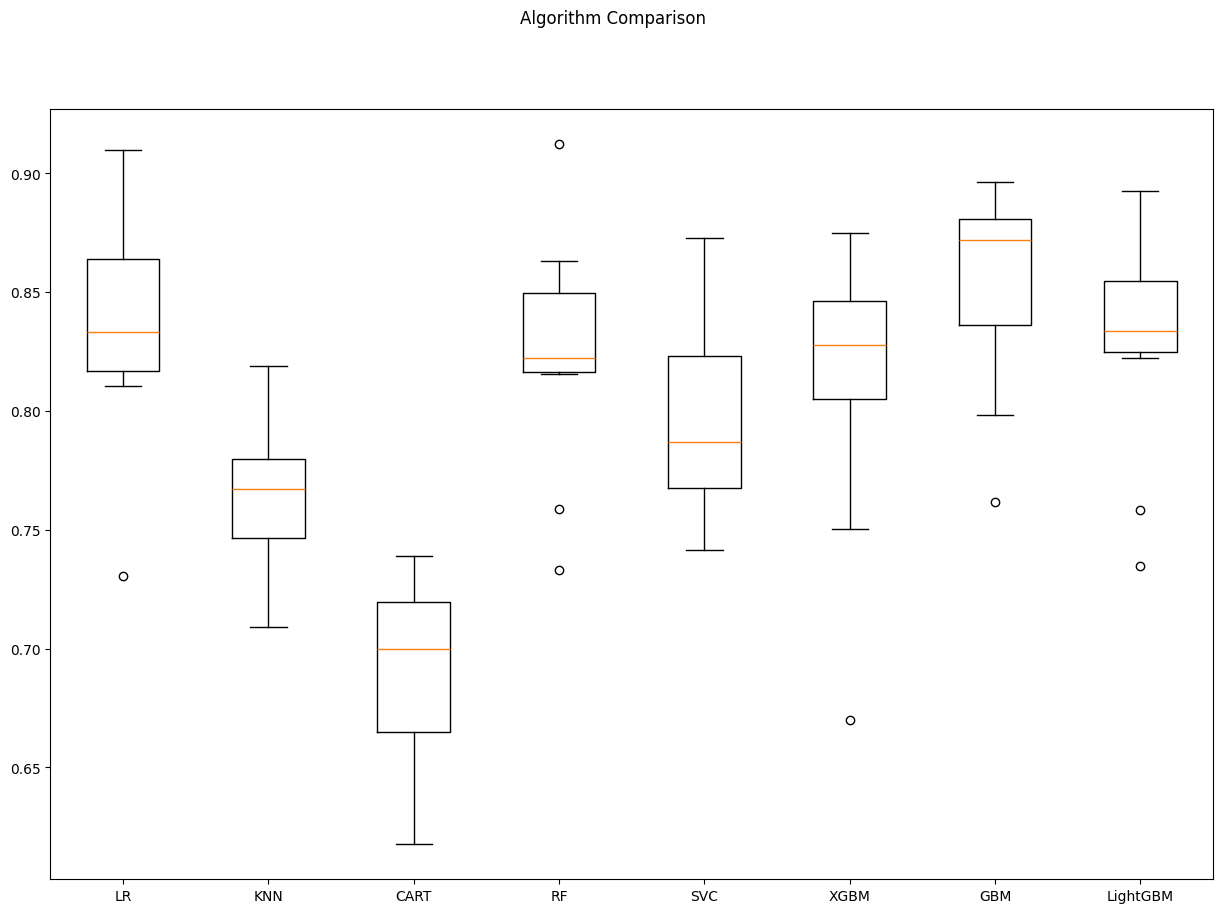

In [55]:
#boxplot for comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6) MODEL TUNING - BEST MODEL

- GBM

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.7272727272727273
ROC-AUC Score: 0.8257407407407407

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80       100
         1.0       0.65      0.48      0.55        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.72      0.73      0.72       154



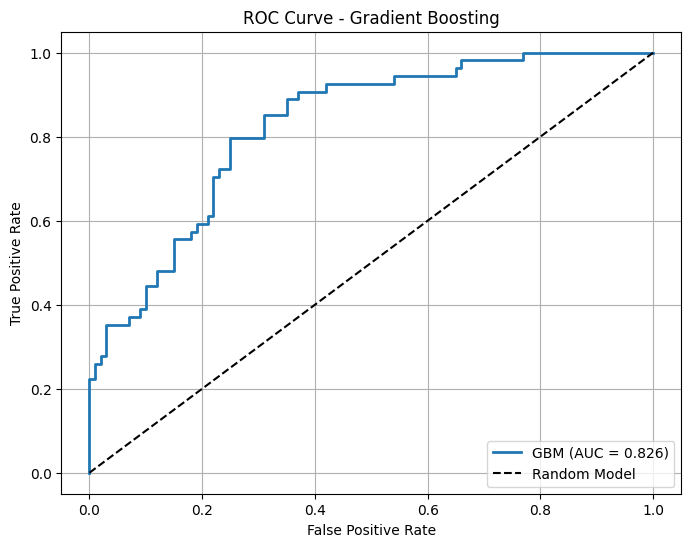

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Define Base Model
gbm_model = GradientBoostingClassifier(random_state=42)

#Hyperparameter Grid

gbm_params = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5, 8],
    "n_estimators": [200, 500],
    "subsample": [0.8, 1.0]
}
#  Stratified Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch
gbm_cv_model = GridSearchCV(
    gbm_model,
    gbm_params,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

gbm_cv_model.fit(X_train, y_train)

print("Best Parameters:", gbm_cv_model.best_params_)

# Final Tuned Model
gbm_tuned = gbm_cv_model.best_estimator_

gbm_tuned.fit(X_train, y_train)

#  Predictions
y_pred = gbm_tuned.predict(X_test)
y_prob = gbm_tuned.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, label=f"GBM (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Model")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


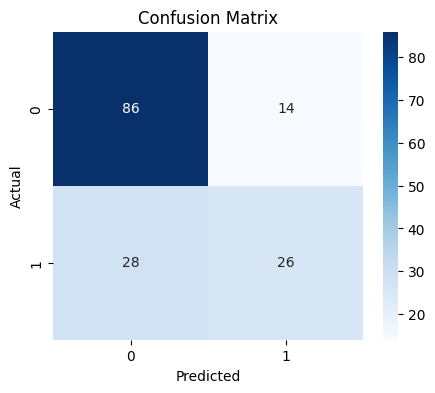

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- Barplots for models

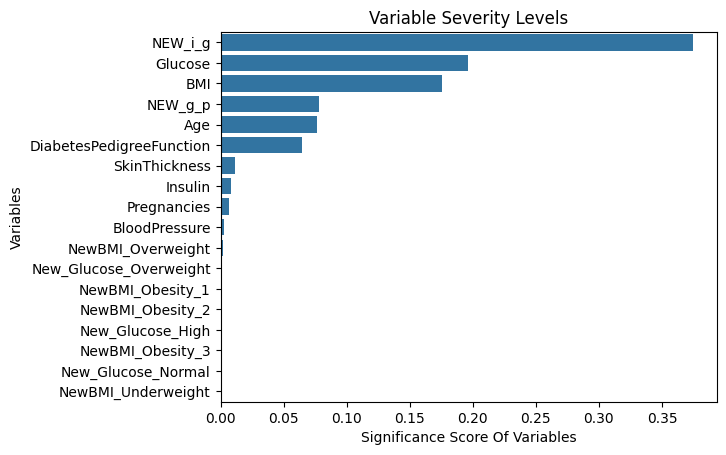

In [58]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()